### Which MOEA is the Best ?

Algorithms to be considered
* SPEA 2
* NSGA 2
* RNSGA2
* MOEA/D (Chebychev , Weighted sum , Penalty Boundary Intersection)
* NSGA 3

Literature Review:
* papers on all these algorithms (Foundational Papers)
* Test Problems Definitions 
* Evaluation Metrics (Strongly Pareto Compliant and Weakly Pareto Compliant)

In [23]:
from pymoo.util.function_loader import is_compiled;print('Compiled Extensions: ', is_compiled())
import numpy as np

Compiled Extensions:  True


In [24]:
model_list = []
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
problem = DTLZ2(n_obj=2)
algorithm = SPEA2(pop_size=1000)
for i in range(5):
    model_list.append(minimize(problem,
                algorithm,
                ('n_gen', 100),
                save_history = True,
                verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |     1000 |     15 |  0.2111436970 |  0.2930021247 |  0.0378794510 |  0.2930021247 |  0.2085555758
     2 |     2000 |     13 |  0.1798615252 |  0.2793609583 |  0.0388247142 |  0.2793609583 |  0.1751454194
     3 |     3000 |     21 |  0.1554782660 |  0.1974429891 |  0.0557546346 |  0.1974429891 |  0.1538551126
     4 |     4000 |     31 |  0.1237115040 |  0.1722364288 |  0.0750378111 |  0.1722364288 |  0.1203335421
     5 |     5000 |     32 |  0.0932400004 |  0.1363453433 |  0.1132793646 |  0.1363453433 |  0.0794492134
     6 |     6000 |     37 |  0.0803688718 |  0.1106660787 |  0.1295330910 |  0.1106601505 |  0.0609489042
     7 |     7000 |     38 |  0.0626318815 |  0.0793807389 |  0.1475533681 |  0.0793748969 |  0.0506261916
     8 |     8000 |     54 |  0.0505630469 |  0.0446082969 |  0.1568556092 |  0.0446064471 |  0.0404105397
     9 |     9000 |     60 |  0.03938

In [25]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]





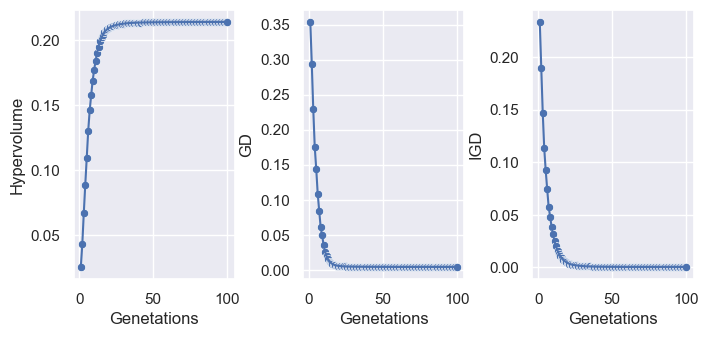

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

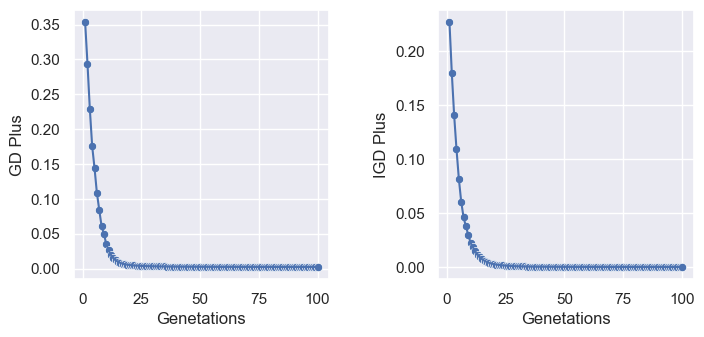

In [33]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



In [38]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_nsga2 = []
problem = DTLZ2(n_obj=2)
algorithm = NSGA2(pop_size=1000)
for i in range(5):
    model_list_nsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |     1000 |     19 |  0.2058326926 |  0.3799262191 |  0.0215021093 |  0.3799260989 |  0.1961436922
     2 |     2000 |     22 |  0.1818287676 |  0.3705227870 |  0.0406339830 |  0.3705226024 |  0.1734281748
     3 |     3000 |     29 |  0.1615517578 |  0.3289993923 |  0.0585406449 |  0.3289992523 |  0.1526245483
     4 |     4000 |     19 |  0.1234276604 |  0.1620177014 |  0.0801267028 |  0.1620177014 |  0.1151908857
     5 |     5000 |     23 |  0.0886983894 |  0.1399916381 |  0.1110183223 |  0.1399916381 |  0.0864568979
     6 |     6000 |     30 |  0.0745064432 |  0.1002662886 |  0.1276173795 |  0.1002662886 |  0.0712859034
     7 |     7000 |     36 |  0.0726492131 |  0.0763002967 |  0.1378018136 |  0.0762970800 |  0.0546975651
     8 |     8000 |     48 |  0.0544186219 |  0.0553897767 |  0.1534155318 |  0.0553859644 |  0.0432043577
     9 |     9000 |     60 |  0.03742

In [39]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]





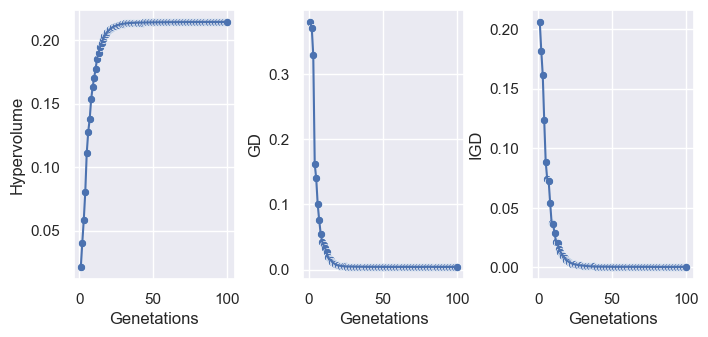

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

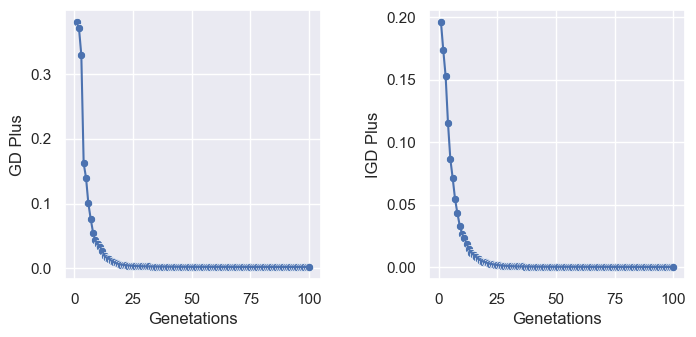

In [41]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



In [44]:
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_moead = []
problem = DTLZ2(n_obj=2)
ref_dirs = get_reference_directions('energy',2,90,seed=1)
algorithm = MOEAD(ref_dirs=ref_dirs , n_neighbours=15)
for i in range(5):
    model_list_moead.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=2,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |       90 |     12 |  0.3217136408 |  0.4410974669 |  0.0119808275 |  0.4410974669 |  0.3192903011
     2 |      180 |     73 |  0.2563709111 |  0.2550787484 |  0.0183332685 |  0.2550787484 |  0.2457642571
     3 |      270 |     51 |  0.1992612016 |  0.2148022414 |  0.0261473482 |  0.2148022414 |  0.1788647321
     4 |      360 |     71 |  0.1727551147 |  0.1133500111 |  0.0631058062 |  0.1133327035 |  0.1128899812
     5 |      450 |     82 |  0.1145291619 |  0.0483443908 |  0.0798944528 |  0.0483117742 |  0.0757147043
     6 |      540 |     85 |  0.0744170144 |  0.0313395479 |  0.1248542400 |  0.0306257930 |  0.0481921909
     7 |      630 |     88 |  0.0655139961 |  0.0200867948 |  0.1372847971 |  0.0194793198 |  0.0385318185
     8 |      720 |     89 |  0.0535134435 |  0.0128782312 |  0.1536015835 |  0.0120941669 |  0.0308958563
     9 |      810 |     89 |  0.04929

In [45]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_moead:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]





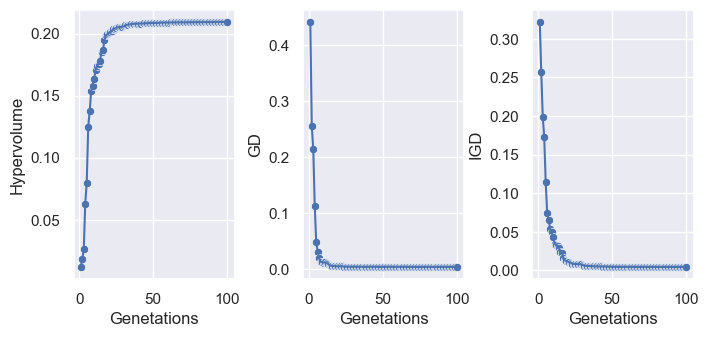

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

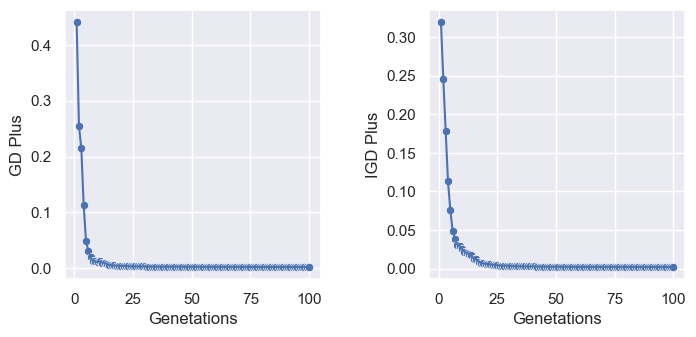

In [47]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



In [54]:
from pymoo.algorithms.moo.rnsga2 import RNSGA2
from pymoo.problems.many import DTLZ2
from pymoo.optimize import minimize
model_list_rnsga2 = []
problem = DTLZ2(n_obj=2)
ref = np.array([0,0])
algorithm = RNSGA2(pop_size = 1000,ref_points=ref,extreme_points_as_reference_points=True)
for i in range(5):
    model_list_rnsga2.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))

IndexError: tuple index out of range

In [ ]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_rnsga2:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]





In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

In [ ]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')



In [55]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.problems.many import DTLZ2
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.optimize import minimize
model_list_nsga3 = []
problem = DTLZ2(n_obj=2)
ref_dirs = get_reference_directions('energy',2,90,seed=1)
algorithm = NSGA3(ref_dirs=ref_dirs)
for i in range(5):
    model_list_nsga3.append(minimize(problem,
               algorithm,
               ('n_gen', 100),
               seed=1,
               save_history = True,
               verbose=True))

n_gen  |  n_eval  | n_nds  |      igd      |       gd      |       hv      |    gd_plus    |    igd_plus  
     1 |       90 |      8 |  0.4924812169 |  0.5544717648 |  0.000000E+00 |  0.5544717648 |  0.4821369000
     2 |      180 |     10 |  0.4116273654 |  0.5382019772 |  0.000000E+00 |  0.5382019772 |  0.4106722467
     3 |      270 |      8 |  0.3062636042 |  0.3855576500 |  0.000000E+00 |  0.3855576500 |  0.2618719536
     4 |      360 |      7 |  0.3727475262 |  0.3500768589 |  0.000000E+00 |  0.3500768589 |  0.3286222231
     5 |      450 |      7 |  0.3193277569 |  0.3096709790 |  0.0023659151 |  0.3096709790 |  0.3057391916
     6 |      540 |      9 |  0.1974267514 |  0.2498115916 |  0.0228768938 |  0.2498115916 |  0.1784018044
     7 |      630 |      9 |  0.2501267254 |  0.2254557392 |  0.0539660820 |  0.2254557392 |  0.2313508824
     8 |      720 |      6 |  0.1799557576 |  0.2087822435 |  0.0588036182 |  0.2087822435 |  0.1686709576
     9 |      810 |      9 |  0.15734

In [56]:
data_hv_per_gen = []
data_gd_per_gen = []
data_igd_per_gen = []
data_gdpl_per_gen = []
data_igdpl_per_gen = []
for i in model_list_nsga3:
    data_1 = []
    data_2 = []
    data_3 = []
    data_4 = []
    data_5 = []
    for j in range(100):
        data_1.append(i.history[j].output.hv.value)
        data_2.append(i.history[j].output.gd.value)
        data_3.append(i.history[j].output.igd.value)
        data_4.append(i.history[j].output.gd_plus.value)
        data_5.append(i.history[j].output.igd_plus.value)
    
    data_hv_per_gen.append(data_1)
    data_gd_per_gen.append(data_2)
    data_igd_per_gen.append(data_3)
    data_gdpl_per_gen.append(data_4)
    data_igdpl_per_gen.append(data_5)

data_avg_hyp_improvement = [sum(num) for num in zip(*data_hv_per_gen)]
data_avg_gd_improvement = [sum(num) for num in zip(*data_gd_per_gen)]
data_avg_igd_improvement = [sum(num) for num in zip(*data_igd_per_gen)]
data_avg_gdplus_improvement =[sum(num) for num in zip(*data_gdpl_per_gen)]
data_avg_igdplus_improvement = [sum(num) for num in zip(*data_igdpl_per_gen)]


data_avg_hyp_improvement = [i/5 for i in data_avg_hyp_improvement ]
data_avg_gd_improvement = [i/5 for i in data_avg_gd_improvement ]
data_avg_igd_improvement = [i/5 for i in data_avg_igd_improvement ]
data_avg_gdplus_improvement =[i/5 for i in data_avg_gdplus_improvement ]
data_avg_igdplus_improvement = [i/5 for i in data_avg_igdplus_improvement ]





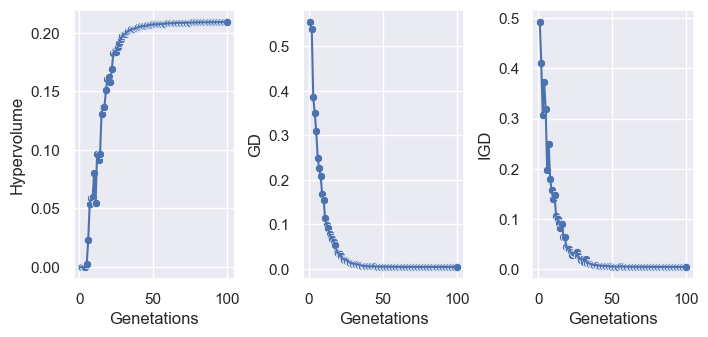

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,3)
sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)
sns.scatterplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_hyp_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='Hypervolume')

sns.scatterplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_gd_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='GD')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
sns.lineplot(x=list(range(1,101)),y=data_avg_igd_improvement,ax=axes[2])
axes[2].set(xlabel='Genetations',ylabel='IGD')


plt.show()

[Text(0.5, 0, 'Genetations'), Text(0, 0.5, 'IGD Plus')]

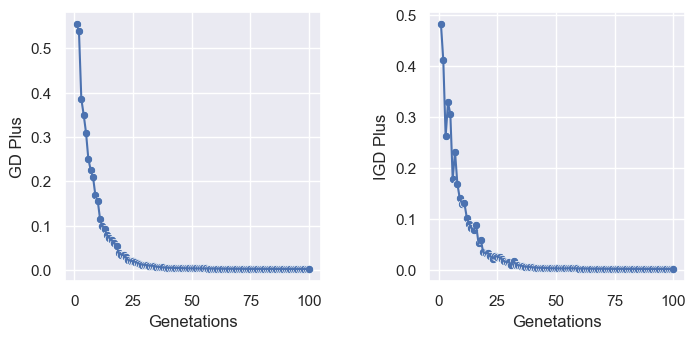

In [58]:
plt.rcParams["figure.figsize"] = [8.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
fig,axes = plt.subplots(1,2)

sns.set_theme(style="darkgrid")
fig.subplots_adjust(hspace=0.425, wspace=0.425)


sns.scatterplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
sns.lineplot(x=list(range(1,101)),y=data_avg_gdplus_improvement,ax=axes[0])
axes[0].set(xlabel='Genetations',ylabel='GD Plus')

sns.scatterplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
sns.lineplot(x=list(range(1,101)),y=data_avg_igdplus_improvement,ax=axes[1])
axes[1].set(xlabel='Genetations',ylabel='IGD Plus')

